### Extract and filter 1000 waveforms of each cluster

Filtering default parameters are a 3rd order butterworth filter between 300 and 10000 Hz. Filtering is important when comparing waveforms.

To extract waveforms you need the raw and the sorted data.


In [ ]:
from spks import *
binary_path = Path('/home/data/JC131/20231004_181500/ephys_g1/ephys_g1_imec0/ephys_g1_t0.imec0.ap.bin')
kilosort_path = Path('/home/data/JC131/20231004_181500/kilosort2.5/imec0/')

data = RawRecording([binary_path],return_preprocessed=False)
clu = Clusters(kilosort_path,get_waveforms=False,get_metrics=False,load_template_features=False)
# Extract the waveforms as save them to clu.folder 'cluster_waveforms.hdf' file
waveforms = clu.extract_waveforms(data,max_n_spikes = 1000,save_folder_path = clu.folder)
# Filtering is not optimized and might take a while, depending on the recording. 
# This will also compute the mean waveform.

<IPython.core.display.Javascript object>


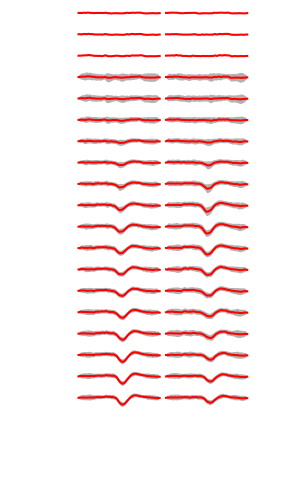

In [29]:
# %matplotlib notebook
plt.figure(figsize=[3,5])
# plot the cluster waveforms accross all channels and overlay with the standard deviation
plot_footprints(clu.cluster_waveforms_mean[clu.cluster_id == 10],clu.channel_positions,
                shade_data = clu.cluster_waveforms_std[clu.cluster_id == 10].squeeze(), color='r');
plt.axis((720, 805., 1407, 1677));

In [ ]:
# if needed
# compute metrics to estimate the location of the spikes
clu.compute_statistics()
# # update the object so indexing includes the new metrics
clu.update_cluster_info()

<IPython.core.display.Javascript object>


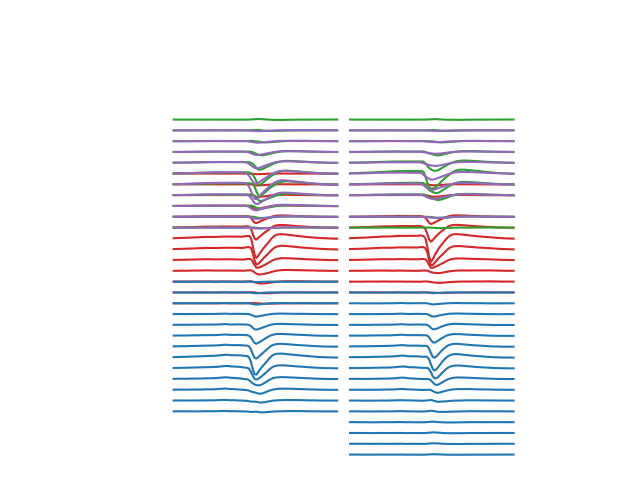

In [10]:
# plot the principal channels for a set of clusters
# %matplotlib notebook
# plot some of the high amplitude clusters
clusters = clu.cluster_id[np.argsort(clu.trough_amplitude)[:5]]
for iclu,c in zip(clusters,['#d62728',
                            '#1f77b4',
                            '#ff7f0e',
                            '#2ca02c',
                            '#9467bd']):
    
    idx = clu.active_channels[clu.cluster_id == iclu][0]
    plot_footprints(clu.cluster_waveforms_mean[clu.cluster_id == iclu].squeeze()[:,idx],clu.channel_positions[idx,:],
                    color=c);
    
plt.axis((718, 808, 1718, 2231));